## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Step 1: Loading the Dataset from the CSV File

In [2]:
# Your code here - remember to use markdown cells for comments as well!
# Import Python frameworks
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading the data as panda dataframe into the df variable
df = pd.read_csv("data/Aviation_Data.csv")
type(df)

/tmp/ipykernel_8743/1053872567.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Aviation_Data.csv")


pandas.core.frame.DataFrame

In [39]:
# Quick check of the first rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight_missing,Purpose.of.flight_missing,fatalities,serious_injuries,injuries,severity,Year,Injury.Severity_missing,severity_score,Total.Aboard
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1948.0,0,0.0,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1962.0,0,0.0,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,0,0,0,0,1974.0,0,0.0,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1977.0,0,0.0,2.0
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1981.0,0,0.0,4.0


### Step 2: Understanding the Data

In [40]:
#This is a user defined function that helps you understand the data 
def inspect_dataset(path):
    df=pd.read_csv(path)
    print('--------data describe-------')
    print(df.describe())
    print('--------data info------')
    print(df.info())
    print('-------data shape----')
    print(df.shape)
    return inspect_dataset

In [5]:
# Using the defined function for detailed description
inspect_dataset("data/Aviation_Data.csv")

/tmp/ipykernel_8743/301064420.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path)


--------data describe-------
       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.0

<function __main__.inspect_dataset(path)>

### Step 3: Checking and Handling missing values

In [6]:
#Checking the first 10 rows of the dataset
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [41]:
#it checks for missing (NaN) values in each column of your DataFrame and returns a count of missing values per column.

df.isnull().sum() 

Event.Id                             0
Investigation.Type                   0
Accident.Number                      0
Event.Date                           0
Location                             9
Country                            114
Latitude                         43077
Longitude                        43087
Airport.Code                     28424
Airport.Name                     26037
Injury.Severity                      0
Aircraft.damage                      0
Aircraft.Category                46901
Registration.Number                 80
Make                                 0
Model                                0
Amateur.Built                       16
Number.of.Engines                  530
Engine.Type                          0
FAR.Description                  46887
Purpose.of.flight                    0
Total.Fatal.Injuries                 0
Total.Serious.Injuries               0
Total.Minor.Injuries                 0
Total.Uninjured                      0
Weather.Condition        

In [42]:
#user defined data audit

def data_audit(df):
    print('Column list:')
    print(df.columns.tolist())

    print('\nBasic info:')
    df.info(show_counts=True)

    print('\nMissing value counts:')
    missing = df.isnull().sum().sort_values(ascending=False)
    return missing[missing>0]

In [9]:
#Conducting the audit
data_audit(df)

Column list:
['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4  

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Event.Id                   1459
Accident.Number            1459
dtype: int64

### Step 3: Feature Engineering
In this step, we create new columns to support our analysis:
* Total.Aboard → Total number of people on board (sum of all injuries and uninjured).
* Fatality.Rate → Proportion of people who died relative to those on board.
* Make_Model → Combined aircraft make and model for easier grouping.
* Fatalities → Alias for total fatal injuries (for visualization and aggregation)
Change to markdown

In [44]:
# Calculate Total Aboard
df['Total.Aboard'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Uninjured']
)

# Calculate Fatality Rate (handle divide by zero)
df['Fatality.Rate'] = df['Total.Fatal.Injuries'] / df['Total.Aboard']
df['Fatality.Rate'] = df['Fatality.Rate'].fillna(0).round(2)

# Combine Make and Model
df['Make_Model'] = df['Make'] + ' ' + df['Model']

# Create Fatalities column
df['Fatalities'] = df['Total.Fatal.Injuries']

# Preview with new columns
df[['Make_Model', 'Fatalities', 'Total.Aboard', 'Fatality.Rate']].head(100)


,Make_Model,Fatalities,Total.Aboard,Fatality.Rate
0,Stinson 108-3,2.0,2.0,1.0
1,Piper PA24-180,4.0,4.0,1.0
2,Cessna 172M,3.0,3.0,1.0
3,Rockwell 112,2.0,2.0,1.0
6,Cessna 180,4.0,4.0,1.0
...,...,...,...,...
125,Cessna 182E,0.0,1.0,0.0
126,Cessna 150H,0.0,1.0,0.0
127,Cessna 340A,0.0,2.0,0.0
128,Piper PA-38-112,0.0,2.0,0.0


In [45]:
# Check to see if the columns were added
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Make_missing', 'Model_missing', 'Broad.phase.of.flight_missing',
       'Purpose.of.flight_missing', 'fatalities', 'serious_injuries',
       'injuries', 'severity', 'Year', 'Injury.Severity_missing',
       'severity_score', 'Total.Aboard', 'Fatality.Rate', 'Make_Model',
       'Fatalities'],
      dtype='object')

In [34]:
# 7. Handling missing values

# Handle missing values in categorical columns
for col in ['Make', 'Model', 'Broad.phase.of.flight', 'Purpose.of.flight']:
    if col in df.columns:
        df[col + '_missing'] = df[col].isnull().astype(int)
        df[col] = df[col].fillna('Unknown')

# Handle missing values in numeric columns
for col in ['fatalities', 'serious_injuries', 'injuries']:
    if col not in df.columns:
        df[col] = 0
    else:
        df[col] = df[col].fillna(0)

print("Imputation complete. Sample:")
df[['Make','Model','fatalities','serious_injuries']].head()


Imputation complete. Sample:


,Make,Model,fatalities,serious_injuries
0,Stinson,108-3,0,0
1,Piper,PA24-180,0,0
2,Cessna,172M,0,0
3,Rockwell,112,0,0
5,Mcdonnell Douglas,DC9,0,0



**Top 10 Aircraft Makes by Total Fatalities**

A horizontal bar chart ranking the 10 aircraft manufacturers with the highest total fatalities. While higher counts may reflect market share rather than poor safety, this analysis helps inform procurement decisions and identify manufacturers requiring closer safety evaluation.


/tmp/ipykernel_8743/3834836969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette="Reds_r")


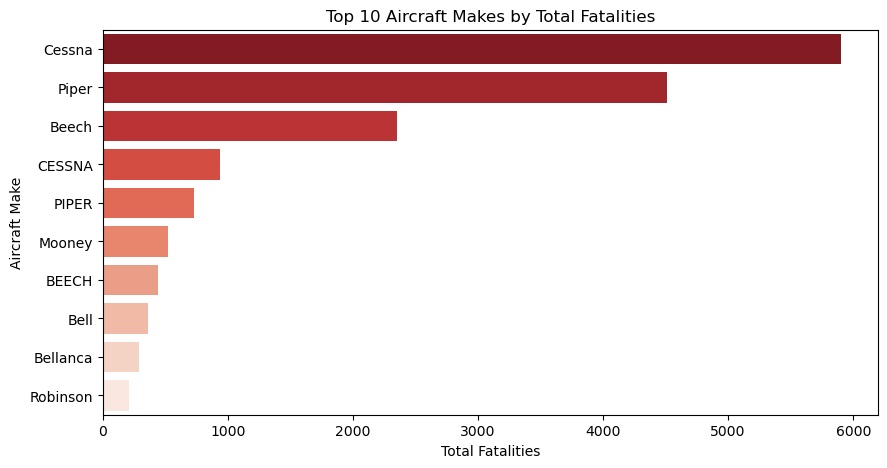

In [51]:
plt.figure(figsize=(10,5))
top_makes = df.groupby('Make')['Fatalities'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_makes.values, y=top_makes.index, palette="Reds_r")
plt.title("Top 10 Aircraft Makes by Total Fatalities")
plt.xlabel("Total Fatalities")
plt.ylabel("Aircraft Make")
plt.show()



## 4. Visualization & Business Recommendation #2
**Average Fatality Rate by Purpose of Flight**

A horizontal bar chart showing which flight purposes (Personal, Commercial, Training, etc.) have the highest average fatality rates when accidents occur. This helps identify high-risk operations that may need enhanced safety measures and informs business decisions around insurance and operational policies.


/tmp/ipykernel_8743/1299048648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_rate.values, y=purpose_rate.index, palette="Blues_r")


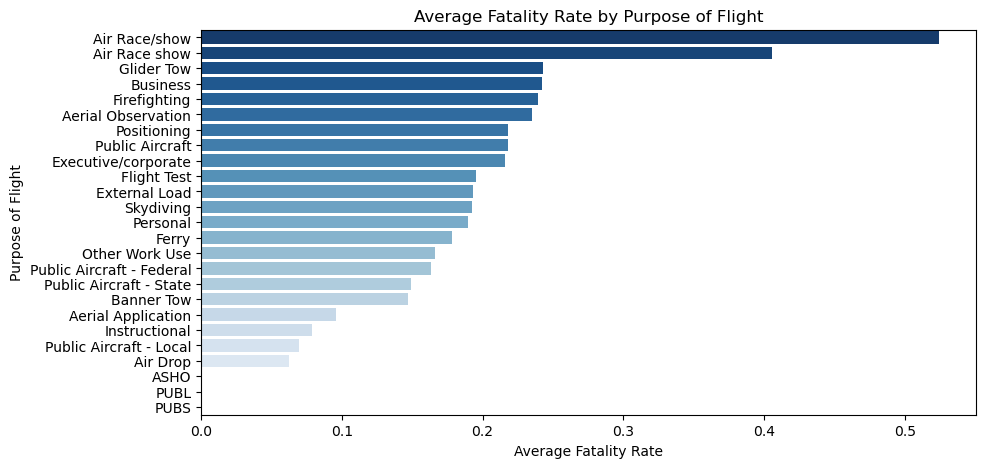

In [52]:
plt.figure(figsize=(10,5))
purpose_rate = df.groupby('Purpose.of.flight')['Fatality.Rate'].mean().sort_values(ascending=False)

sns.barplot(x=purpose_rate.values, y=purpose_rate.index, palette="Blues_r")
plt.title("Average Fatality Rate by Purpose of Flight")
plt.xlabel("Average Fatality Rate")
plt.ylabel("Purpose of Flight")
plt.show()


### Step 3: Total Fatalities by Engine Type
**Total Fatalities by Engine Type**

A horizontal bar chart displaying the cumulative fatalities associated with each engine type (Reciprocating, Turbo Prop, Turbo Jet, etc.). This analysis helps identify which engine types have the highest historical fatality counts, informing fleet safety decisions and maintenance priorities.

/tmp/ipykernel_8743/141781727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_fatalities.values, y=engine_fatalities.index, palette="Greens_r")


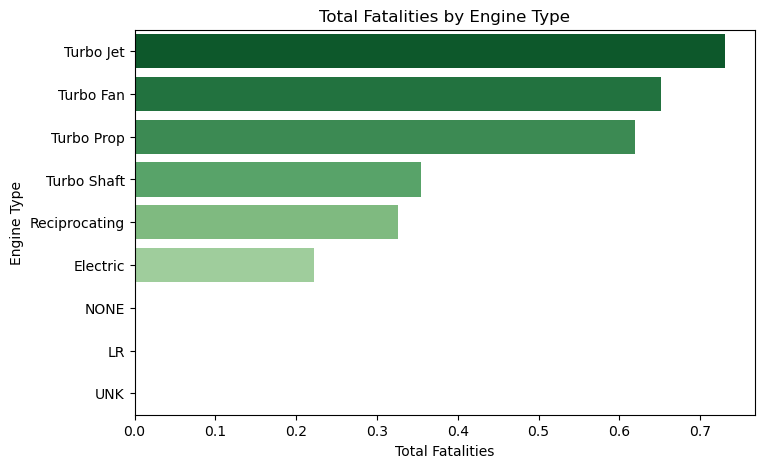

In [58]:
plt.figure(figsize=(8,5))
engine_fatalities = df.groupby('Engine.Type')['Fatalities'].mean().sort_values(ascending=False)

sns.barplot(x=engine_fatalities.values, y=engine_fatalities.index, palette="Greens_r")
plt.title("Total Fatalities by Engine Type")
plt.xlabel("Total Fatalities")
plt.ylabel("Engine Type")
plt.show()


### Step 4: Fatalities by Purpose of Flight

**Total Fatalities by Purpose of Flight**

A pie chart showing the percentage distribution of total fatalities across different flight purposes (Personal, Commercial, Training, etc.). This reveals which operations account for the largest share of accident deaths, helping prioritize safety investments and resource allocation.

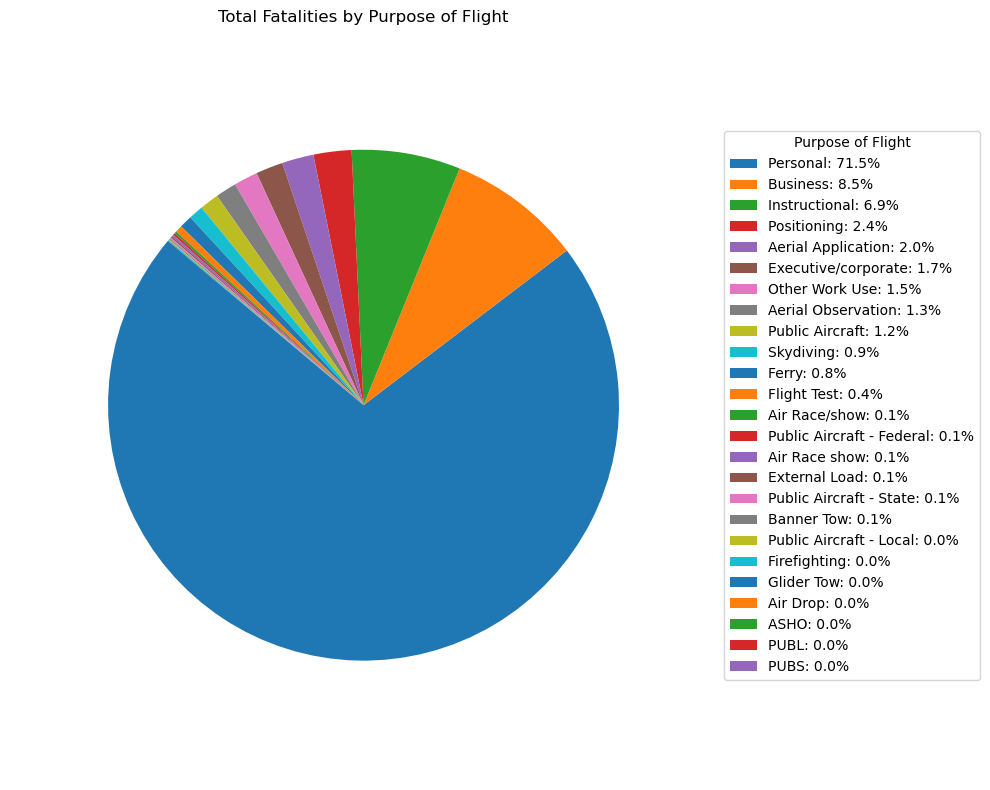

In [ ]:
# Group by purpose and sum fatalities
flight_fatalities = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Calculate percentages
total_fatalities = flight_fatalities.sum()
percentages = (flight_fatalities / total_fatalities) * 100

plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(flight_fatalities, startangle=140)

#Labels and percentages
legend_labels = [f"{label}: {pct:.1f}%" for label, pct in zip(flight_fatalities.index, percentages)]
plt.legend(wedges, legend_labels, title="Purpose of Flight", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Total Fatalities by Purpose of Flight')
plt.axis('equal')
plt.tight_layout()
plt.show()
